<h1>Construir tablero de cohortes y Ltv con filtro por categoría</h1>

El proyecto consiste en usar zoho analytics para hacer calculos y transformación de datos con el fin obtener los siguientes datos
1. Analisis de cohortes con filtro por categoría (habiendo 8 categorías o tipos de clientes)
2. Calcluar el promedio de deserción por categoría de cliente
3. Calcular el LTV usando el dato de la columna revenue y calculando la tasa de retención segun el analisis de cohortes


<h1> Procedimientos</h1>

1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Carga de dataset en DataFrames
4. Análisis Exploratorio de Datos EDA
    - Cantidad de filas y variables
    - Vista aleatoria de cinco filas
    - Nombres de las variables
    - Tipos de las variables
    - Filas duplicadas
    - Variables con valores faltantes
    - Variables con valores atípicos (outliers) ó valores extremos
5. Preprocesamiento:
    - Seleccionar variables de interés (Feactures)
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
6. Transformaciones
    - Convertir formato de decimales
    - Convertir formato de fecha
7. KPIs mensuales


### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

Agregar aqui el código

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/240315-1_machine_learning_analisis_ventas_cohortes/requirements.txt"

In [14]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**

Agregar aqui el código

In [15]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
#pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from datetime import datetime, timedelta

from __future__ import division
# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import plotly.graph_objs as go
# Runtime error: chart is displayed blank.
# When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
#initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'

### **3. Carga de dataset en DataFrames**

Agregar aqui el código

In [147]:
path= '/content/drive/MyDrive/Colab Notebooks/240315-1_machine_learning_analisis_ventas_cohortes/datasets/Analisis.csv'
ventas_df = pd.read_csv(path,sep=';')

### **4. Análisis Exploratorio de Datos EDA**

**Cantidad de filas y variables**
    

In [115]:
print("Numero de filas ",ventas_df.shape[0])
print("Numero de campos ",ventas_df.shape[1])

Numero de filas  79322
Numero de campos  10


**Vista aleatoria de cinco filas**

In [116]:
ventas_df.sample(5)

,#,DOCUMENTO,VENDEDOR,CODCLIENTE,CATEGORIA,FECHA,GRUPO,UTILIDAD,TOTAL,U_Sub_Familia
4557,4558,17911,GDV,C01906,Cliente Final,27/06/2022,Ferreterí,"0,4","2,4",SOPORTERIA
27896,27897,1000021104,Jesus Atencio,C00394,Cliente Final,14/10/2022,Gases Combustibles,"10,19","20,25",PROPANO
15005,15006,1000022905,Mónica Valenci,C01007,Contratista A/C,19/12/2022,Ferreterí,"36,11","65,6",SOPORTERIA
54848,54849,1000026905,Jesus Atencio,C00276,Técnico Independient,04/05/2023,PEX,"3,34","6,06",OTROS
66786,66787,1000035572,GDV,C01906,Cliente Final,11/01/2024,Ferreterí,"4,71","15,7",SOPORTERIA


Notamos valores negativos en las variables UTILIDAD y TOTAL

**Nombres y Tipos de las variables**

In [117]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79322 entries, 0 to 79321
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   #              79322 non-null  int64 
 1   DOCUMENTO      79322 non-null  int64 
 2   VENDEDOR       79322 non-null  object
 3   CODCLIENTE     79322 non-null  object
 4   CATEGORIA      79322 non-null  object
 5   FECHA          79322 non-null  object
 6   GRUPO          79260 non-null  object
 7   UTILIDAD       79322 non-null  object
 8   TOTAL          79322 non-null  object
 9   U_Sub_Familia  70983 non-null  object
dtypes: int64(2), object(8)
memory usage: 6.1+ MB


**Observación:** las variables UTILIDAD y TOTAL no son de tipo numéricas continuas (punto flotante) como debió ser, esto es debido a que el caracter de separación decimal es la coma y Pandas interpretó estos campos de tipo string

In [148]:
#Para poder continuar con el análisis exploratorio debemos sustituir la  coma decimal por punto decimal en las variables con valores numéricos
ventas_df["UTILIDAD"].replace(to_replace=',', value='.', regex=True,inplace=True)
ventas_df["TOTAL"].replace(to_replace=',', value='.', regex=True,inplace=True)

In [149]:
# Ahora se debe convertir los campos UTILIDAD y TOTAL de tipo string  a tipo punto flotante
ventas_df["UTILIDAD"] = ventas_df["UTILIDAD"].astype(float)
ventas_df["TOTAL"] = ventas_df["TOTAL"].astype(float)

 Otras dos formas de remplazar una cadena de caracteres en campos de un dataframe:
- ventas_df["UTILIDAD"] = ventas_df["UTILIDAD"].apply(lambda x: x.replace(",","."))

- ventas_df.UTILIDAD.str.replace(',', ';')

Tres formas de convertir un string en entero:
- df["dataframe_column"] = df["dataframe_column"].astype(int)

- df["dataframe_column"] = df["dataframe_column"].apply(int)

- df["dataframe_column"] = df["dataframe_column"].map(int)

**Filas duplicadas**

In [120]:
ventas_df[ventas_df.duplicated()]

,#,DOCUMENTO,VENDEDOR,CODCLIENTE,CATEGORIA,FECHA,GRUPO,UTILIDAD,TOTAL,U_Sub_Familia


Observación: No hay registros duplicados

**Variables con valores faltantes**

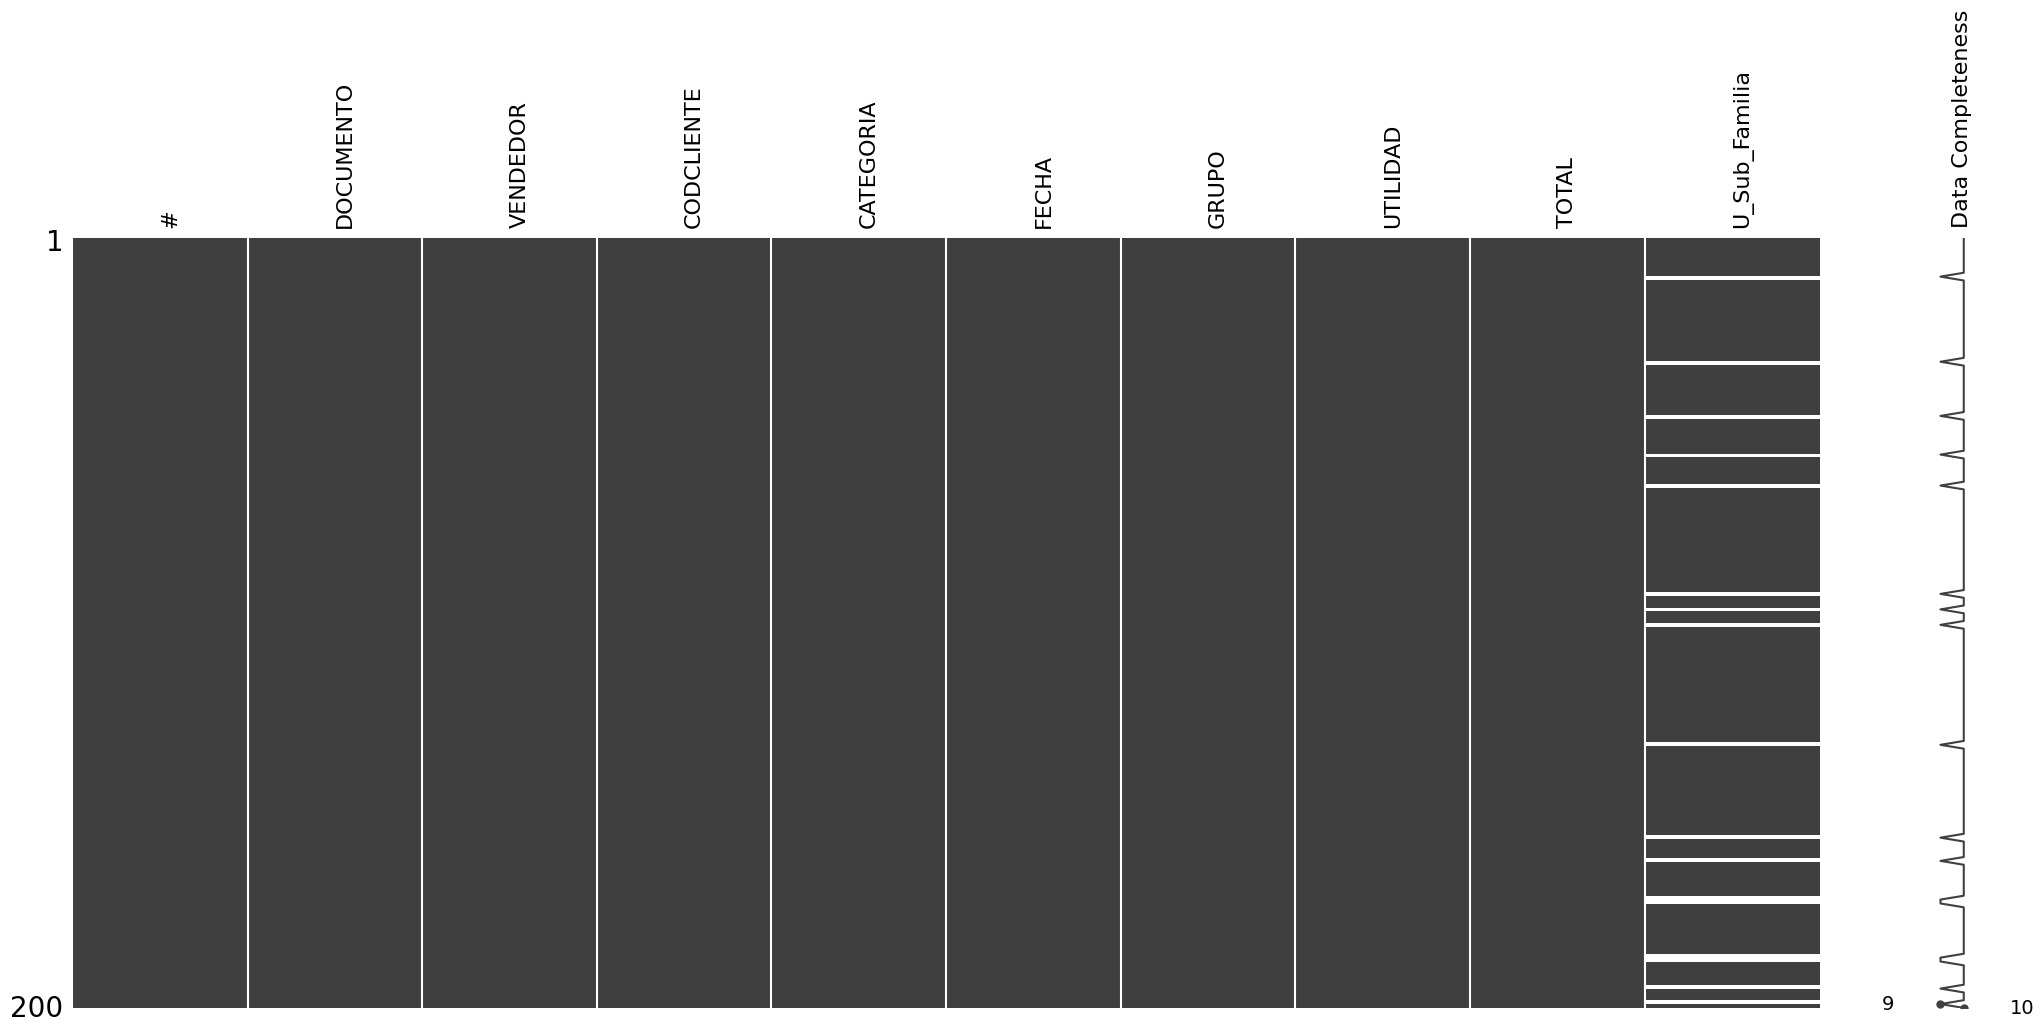

In [121]:
# Tomamos 200 muestras al azar de nuestra población
msno.matrix(ventas_df.sample(200), labels = True, label_rotation = 90)
plt.show()

Observación: Los campos GRUPO y U_Sub_Familia presentan valores faltantes

In [122]:
#Analizamos la columna U_Sub_Familia que es la que presenta mas valores faltantes
print('Porcentaje de valores faltantes de la variable U_Sub_Familia:', round((ventas_df.U_Sub_Familia.isnull().sum()/len(ventas_df)) * 100,2), '%')

Porcentaje de valores faltantes de la variable U_Sub_Familia: 10.51 %


**Observación**: Para este estudio la variable **U_Sub_Familia** y la variable **GRUPO** no son relevantes así que se eliminarán del dataset mas adelante

**Variables con valores atípicos (outliers) ó valores extremos**

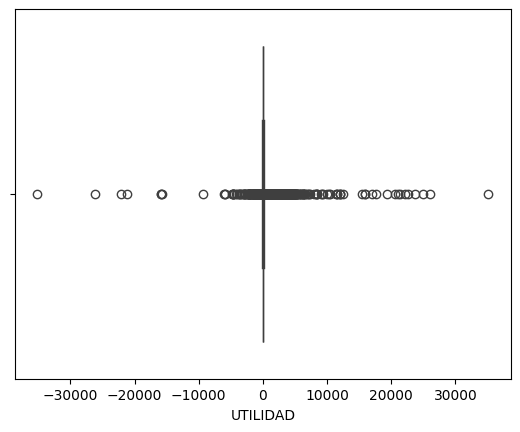

In [123]:
#Campos con valores atípicos:
sns.boxplot(x = 'UTILIDAD',  data= ventas_df )
plt.show()

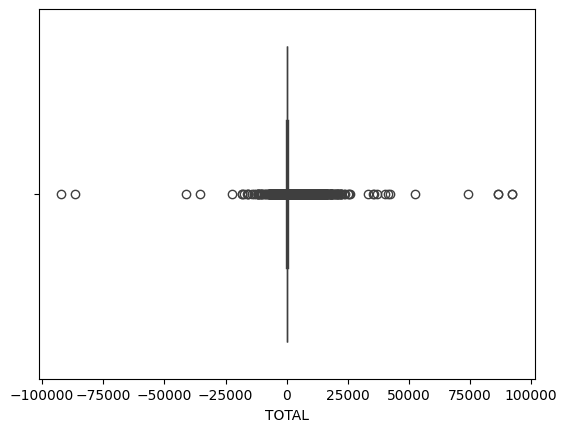

In [124]:
#Campos con valores atípicos:
sns.boxplot(x = 'TOTAL',  data= ventas_df )
plt.show()

**Observación:** La variables UTILIDAD y TOTAL presentan valores negativos los cuales son atípicos para cantidades monetarias, sin embargo puede tener significado en el caso de representar transacciones de credito o debito. Por ahora solo eliminaremos esos valores del dataFrame para que no afecte las medidas de tendencias centrales.

In [125]:
# Pero antes verifiquemos que tantos valores atípicos hay en dichos campos:
atipicos_utilidad = (ventas_df['UTILIDAD'] < 0).sum()
porcentaje_utilidad = round((atipicos_utilidad / len(ventas_df))*100, 2)
atipicos_total = (ventas_df['UTILIDAD'] < 0).sum()
porcentaje_total = round((atipicos_total / len(ventas_df))*100,2)
print("Total de valores atípicos en el campo UTILIDAD: {} ({}% del total)".format(atipicos_utilidad,porcentaje_utilidad))
print("Total de valores atípicos en el campo TOTAL: {} ({}% del total)".format(atipicos_total,porcentaje_total))

Total de valores atípicos en el campo UTILIDAD: 3875 (4.89% del total)
Total de valores atípicos en el campo TOTAL: 3875 (4.89% del total)


### **5. Preprocesamiento**

**Seleccionar variables significativas (Feactures)**

In [150]:
ventas_interes_df = ventas_df[['CODCLIENTE','CATEGORIA', 'FECHA', 'UTILIDAD', 'TOTAL']]

**Tratamiento de variables con valores faltantes**

Se eliminaron las variables (columnas) con valores faltantes en el paso anterior

**Tratamiento de datos extremos y datos atípicos**

In [127]:
ventas_interes_df.query("UTILIDAD < 0")

,CODCLIENTE,CATEGORIA,FECHA,UTILIDAD,TOTAL
505,C01052,Cliente Final,05/01/2022,-73.51,250.84
892,CL00057,Agrícol,09/05/2022,-23.51,270.38
1981,C00493,Contratista Refrigeració,12/12/2022,-21.72,0.00
2053,C00141,Contratista A/C,30/12/2022,-26.00,0.00
2251,CL01531,Cliente Final,24/07/2023,-12.23,0.00
...,...,...,...,...,...
79255,CL01025,Técnico Independient,01/03/2024,-21.66,-61.77
79256,CL01025,Técnico Independient,01/03/2024,-17.81,-44.52
79257,CL01025,Técnico Independient,01/03/2024,-2.11,-5.57
79258,CL01025,Técnico Independient,01/03/2024,-5.97,-11.60


In [151]:
ventas_clientes_df = ventas_interes_df.query("UTILIDAD > 0")
ventas_clientes_df = ventas_interes_df.query("TOTAL > 0")
ventas_clientes_df

,CODCLIENTE,CATEGORIA,FECHA,UTILIDAD,TOTAL
0,C01292,Cliente Final,21/06/2022,8.20,18.20
1,C01292,Cliente Final,21/06/2022,5.62,14.05
2,C01292,Cliente Final,21/06/2022,5.39,15.39
3,C01292,Cliente Final,21/06/2022,40.98,117.04
4,C01039,Cliente Final,21/06/2022,6.67,14.82
...,...,...,...,...,...
75676,CL00194,Contratista A/C,20/06/2022,26.35,105.39
75677,C00540,Contratista A/C,21/06/2022,4.16,10.40
75678,C00540,Contratista A/C,21/06/2022,0.91,2.28
75679,C00540,Contratista A/C,21/06/2022,3.45,9.86


### **6. Transformaciónes**

**Convertir formato de decimales**

**Convertir formato de fecha**

### **7. KPIs mensuales**

**Utilidad mensual**

In [152]:
#converting the type of Invoice Date Field from string to datetime.
ventas_clientes_df['FECHA'] = pd.to_datetime(ventas_clientes_df['FECHA'])
#creating YearMonth field for the ease of reporting and visualization
ventas_clientes_df['YearMonth'] = ventas_clientes_df['FECHA'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns

utilidad_ventas_clientes_df = ventas_clientes_df.groupby(['YearMonth'])['UTILIDAD'].sum().reset_index()
utilidad_ventas_clientes_df.head(10)

,YearMonth,UTILIDAD
0,202201,171727.12
1,202202,160634.30
2,202203,201467.69
3,202204,220010.00
4,202205,199250.62
5,202206,151071.27
6,202207,216771.58
7,202208,193745.63
8,202209,190219.69
9,202210,159939.85


In [155]:
#Graficamos la utilidad mensual
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
plot_data = [
    go.Scatter(
        x=utilidad_ventas_clientes_df.query("YearMonth < 202403")['YearMonth'],
        y=utilidad_ventas_clientes_df.query("YearMonth < 202403")['UTILIDAD'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Utilidad mensual'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Tasa de crecimiento de ingresos mensuales:**

In [156]:
#using pct_change() function to see monthly percentage change
utilidad_ventas_clientes_df['crecimientoMensual'] = utilidad_ventas_clientes_df['UTILIDAD'].pct_change()

#showing first 5 rows
utilidad_ventas_clientes_df.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=utilidad_ventas_clientes_df.query("YearMonth < 202403")['YearMonth'],
        y=utilidad_ventas_clientes_df.query("YearMonth < 202403")['crecimientoMensual'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasa de crecimiento mensual'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Actividad mensual de clientes**

In [159]:

#creating monthly active customers dataframe by counting unique Customer IDs
activida_mensual_clientes_df = ventas_clientes_df.groupby('YearMonth')['CODCLIENTE'].nunique().reset_index()

#print the dataframe
activida_mensual_clientes_df


,YearMonth,CODCLIENTE
0,202201,325
1,202202,281
2,202203,337
3,202204,341
4,202205,320
5,202206,332
6,202207,355
7,202208,344
8,202209,350
9,202210,351


In [161]:

#plotting the output
plot_data = [
    go.Bar(
        x=activida_mensual_clientes_df.query("YearMonth < 202403")['YearMonth'],
        y=activida_mensual_clientes_df.query("YearMonth < 202403")['CODCLIENTE'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Clientes que compraron por mes'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Cantidad de ordenes mensuales**

In [158]:
#create a new dataframe for no. of order by using quantity field
ventas_mensuales = ventas_clientes_df.groupby('YearMonth')['UTILIDAD'].count().reset_index()

#print the dataframe
ventas_mensuales


,YearMonth,UTILIDAD
0,202201,2150
1,202202,1785
2,202203,2487
3,202204,2241
4,202205,2283
5,202206,2139
6,202207,2030
7,202208,2815
8,202209,2336
9,202210,2188


In [162]:
#plot
plot_data = [
    go.Bar(
        x=ventas_mensuales.query("YearMonth < 202403")['YearMonth'],
        y=ventas_mensuales.query("YearMonth < 202403")['UTILIDAD'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Cantidad de ordenes por mes'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [163]:
# create a new dataframe for average revenue by taking the mean of it
promedio_ordenes_mensuales = ventas_clientes_df.groupby('YearMonth')['UTILIDAD'].mean().reset_index()

#print the dataframe
promedio_ordenes_mensuales

,YearMonth,UTILIDAD
0,202201,79.873079
1,202202,89.991204
2,202203,81.008319
3,202204,98.174922
4,202205,87.275786
5,202206,70.627055
6,202207,106.784030
7,202208,68.826156
8,202209,81.429662
9,202210,73.098652


In [164]:

#plot the bar chart
plot_data = [
    go.Bar(
        x=promedio_ordenes_mensuales.query("YearMonth < 202403")['YearMonth'],
        y=promedio_ordenes_mensuales.query("YearMonth < 202403")['UTILIDAD'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Promedio de ordenes mensuales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [165]:
#create a dataframe contaning CustomerID and first purchase date
primera_compra = ventas_clientes_df.groupby('CODCLIENTE').FECHA.min().reset_index()
primera_compra.columns = ['CODCLIENTE','fechaPrimeraCompra']
primera_compra['Cohorte'] = primera_compra['fechaPrimeraCompra'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
ventas_clientes_df = pd.merge(ventas_clientes_df, primera_compra, on='CODCLIENTE')


ventas_clientes_df.head()


,CODCLIENTE,CATEGORIA,FECHA,UTILIDAD,TOTAL,YearMonth,fechaPrimeraCompra,Cohorte
0,C01292,Cliente Final,2022-06-21,8.20,18.20,202206,2022-05-26,202205
1,C01292,Cliente Final,2022-06-21,5.62,14.05,202206,2022-05-26,202205
2,C01292,Cliente Final,2022-06-21,5.39,15.39,202206,2022-05-26,202205
3,C01292,Cliente Final,2022-06-21,40.98,117.04,202206,2022-05-26,202205
4,C01292,Cliente Final,2022-05-26,302.81,800.00,202205,2022-05-26,202205


In [167]:
#create a column called User Type and assign Existing
#if User's First Purchase Year Month before the selected Invoice Year Month
ventas_clientes_df['tipoCliente'] = 'Nuevo'
ventas_clientes_df.loc[ventas_clientes_df['YearMonth']>ventas_clientes_df['Cohorte'],'tipoCliente'] = 'Repite'

#calculate the Revenue per month for each user type
utilidad_por_tipo_cliente_df = ventas_clientes_df.groupby(['YearMonth','tipoCliente'])['UTILIDAD'].sum().reset_index()

#filtering the dates and plot the result
utilidad_por_tipo_cliente_df = utilidad_por_tipo_cliente_df.query("YearMonth != 202201 and YearMonth != 202403")
plot_data = [
    go.Scatter(
        x=utilidad_por_tipo_cliente_df.query("tipoCliente == 'Repite' and YearMonth < 202403")['YearMonth'],
        y=utilidad_por_tipo_cliente_df.query("tipoCliente == 'Repite' and YearMonth < 202403")['UTILIDAD'],
        name = 'Repite'
    ),
    go.Scatter(
        x=utilidad_por_tipo_cliente_df.query("tipoCliente == 'Nuevo' and YearMonth < 202403")['YearMonth'],
        y=utilidad_por_tipo_cliente_df.query("tipoCliente == 'Nuevo' and YearMonth < 202403")['UTILIDAD'],
        name = 'Nuevo'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Clientes nuevos y clientes que repiten'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [168]:
ventas_clientes_df

,CODCLIENTE,CATEGORIA,FECHA,UTILIDAD,TOTAL,YearMonth,fechaPrimeraCompra,Cohorte,tipoCliente
0,C01292,Cliente Final,2022-06-21,8.20,18.20,202206,2022-05-26,202205,Repite
1,C01292,Cliente Final,2022-06-21,5.62,14.05,202206,2022-05-26,202205,Repite
2,C01292,Cliente Final,2022-06-21,5.39,15.39,202206,2022-05-26,202205,Repite
3,C01292,Cliente Final,2022-06-21,40.98,117.04,202206,2022-05-26,202205,Repite
4,C01292,Cliente Final,2022-05-26,302.81,800.00,202205,2022-05-26,202205,Nuevo
...,...,...,...,...,...,...,...,...,...
75625,CL00313,Agrícol,2022-06-14,6.22,17.78,202206,2022-06-14,202206,Nuevo
75626,C00316,Cliente Final,2022-06-14,32.10,71.32,202206,2022-06-14,202206,Nuevo
75627,CL00322,Cliente Final,2022-06-16,40.34,336.00,202206,2022-06-16,202206,Nuevo
75628,C01734,Cliente Final,2022-06-17,14.70,41.98,202206,2022-06-17,202206,Nuevo


In [169]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tasa_nuevos_clientes = ventas_clientes_df.query("tipoCliente == 'Nuevo'").groupby(['YearMonth'])['CODCLIENTE'].nunique()/ventas_clientes_df.query("tipoCliente == 'Repite'").groupby(['YearMonth'])['CODCLIENTE'].nunique()
tasa_nuevos_clientes= tasa_nuevos_clientes.reset_index()
tasa_nuevos_clientes = tasa_nuevos_clientes.dropna()

#print the dafaframe
tasa_nuevos_clientes

,YearMonth,CODCLIENTE
1,202202,0.965035
2,202203,0.764398
3,202204,0.550000
4,202205,0.454545
5,202206,0.360656
6,202207,0.420000
7,202208,0.323077
8,202209,0.330798
9,202210,0.244681
10,202211,0.245791


In [170]:
#plot the result

plot_data = [
    go.Bar(
        x=tasa_nuevos_clientes.query("YearMonth>202201 and YearMonth<202403")['YearMonth'],
        y=tasa_nuevos_clientes.query("YearMonth>202201 and YearMonth<202403")['CODCLIENTE'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasa nuevos clientes'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Tasa de retención mensual**

In [171]:
#identify which users are active by looking at their revenue per month
utilidad_mes_por_cliente = ventas_clientes_df.groupby(['CODCLIENTE','YearMonth'])['UTILIDAD'].sum().reset_index()

#create retention matrix with crosstab
retencion_de_clientes = pd.crosstab(utilidad_mes_por_cliente['CODCLIENTE'], utilidad_mes_por_cliente['YearMonth']).reset_index()

retencion_de_clientes.head(10)

YearMonth,CODCLIENTE,202201,202202,202203,202204,202205,202206,202207,202208,202209,...,202403,202404,202405,202406,202407,202408,202409,202410,202411,202412
0,C00002,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,C00003,0,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,C00006,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C00007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C00008,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
5,C00009,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,C00015,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,C00016,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,C00019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,C00021,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0


In [172]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = retencion_de_clientes.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = int(selected_month)
    retention_data['TotalClientes'] = retencion_de_clientes[selected_month].sum()
    retention_data['TotalClientesRetenidos'] = retencion_de_clientes[(retencion_de_clientes[selected_month]>0) & (retencion_de_clientes[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
retencion_de_clientes = pd.DataFrame(retention_array)
retencion_de_clientes['TasaDeRetenciones'] = retencion_de_clientes['TotalClientesRetenidos']/retencion_de_clientes['TotalClientes']
retencion_de_clientes.head()


,YearMonth,TotalClientes,TotalClientesRetenidos,TasaDeRetenciones
0,202203,337,153,0.454006
1,202204,341,170,0.498534
2,202205,320,154,0.481250
3,202206,332,156,0.469880
4,202207,355,160,0.450704


In [173]:

#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=retencion_de_clientes.query("YearMonth<202403")['YearMonth'],
        y=retencion_de_clientes.query("YearMonth<202403")['TasaDeRetenciones'],
        name="organic"
    )

]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasas de retención mensual'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

**Retencion basada en cohortes**

In [146]:
#create our retention table again with crosstab() and add firs purchase year month view
retencionClientes2 = pd.crosstab(utilidad_mes_por_cliente['CODCLIENTE'], utilidad_mes_por_cliente['YearMonth']).reset_index()
retencionClientes2 = pd.merge(retencionClientes2,primera_compra[['CODCLIENTE','Cohorte']],on='CODCLIENTE')
new_column_names = [ 'm_' + str(column) for column in retencionClientes2.columns[:-1]]
new_column_names.append('Cohorte')
retencionClientes2.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan

    total_user_count = retencionClientes2[retencionClientes2.Cohorte ==  selected_month].Cohorte.count()
    retention_data['TotalClientes'] = total_user_count
    retention_data[selected_month] = 1

    query = "Cohorte == {}".format(selected_month)


    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(retencionClientes2.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

retencionClientes2 = pd.DataFrame(retention_array)
retencionClientes2.index = months

#showing new cohort based retention table
retencionClientes2

,TotalClientes,202202,202203,202204,202205,202206,202207,202208,202209,202210,...,202403,202404,202405,202406,202407,202408,202409,202410,202411,202412
YearMonth,,,,,,,,,,,,,,,,,,,,,
202202,138,1.0,0.31,0.30,0.20,0.25,0.22,0.22,0.22,0.23,...,0.02,0.02,0.04,0.03,0.02,0.05,0.05,0.02,0.03,0.02
202203,146,NaN,1.00,0.27,0.16,0.16,0.15,0.18,0.21,0.18,...,0.01,0.01,0.03,0.01,0.01,0.03,0.02,0.00,0.02,0.02
202204,121,NaN,NaN,1.00,0.11,0.17,0.16,0.14,0.14,0.12,...,0.02,0.01,0.01,0.02,0.01,0.02,0.00,0.00,0.02,0.01
202205,100,NaN,NaN,NaN,1.00,0.12,0.14,0.15,0.12,0.13,...,0.00,0.01,0.00,0.01,0.01,0.03,0.00,0.01,0.00,0.00
202206,88,NaN,NaN,NaN,NaN,1.00,0.10,0.12,0.15,0.18,...,0.01,0.02,0.03,0.01,0.00,0.03,0.01,0.01,0.01,0.02
202207,105,NaN,NaN,NaN,NaN,NaN,1.00,0.10,0.10,0.12,...,0.04,0.03,0.03,0.02,0.00,0.02,0.00,0.01,0.02,0.00
202208,84,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.04,0.11,...,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
202209,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.09,...,0.01,0.02,0.02,0.01,0.01,0.01,0.02,0.00,0.00,0.00
202210,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00


In [174]:
path= '/content/drive/MyDrive/Colab Notebooks/240315-1_machine_learning_analisis_ventas_cohortes/datasets/tabla_retencion_cohortes.csv'
retencionClientes2.to_csv(path, sep=';')

**Fin del cuaderno**